In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import nltk
from nltk.corpus import stopwords

from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
stop_words = STOP_WORDS
import string
punctuations = string.punctuation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
train = pd.read_csv('/content/drive/MyDrive/ZS_assignment_dataset/train_file.csv')
test = pd.read_csv('/content/drive/MyDrive/ZS_assignment_dataset/test_file.csv')

In [8]:
train.head(1)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.0,-0.0533


In [9]:
test.head(1)

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn
0,tFrqIR6Chj,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,0,0,1


In [10]:
print(f'Training data size: {train.shape}')
print(f'Training data size: {test.shape}')

Training data size: (55932, 11)
Training data size: (37288, 9)


#Check missing values

In [11]:
train.isnull().sum()

IDLink                 0
Title                  0
Headline               0
Source               175
Topic                  0
PublishDate            0
Facebook               0
GooglePlus             0
LinkedIn               0
SentimentTitle         0
SentimentHeadline      0
dtype: int64

In [12]:
test.isnull().sum()

IDLink           0
Title            0
Headline         0
Source         101
Topic            0
PublishDate      0
Facebook         0
GooglePlus       0
LinkedIn         0
dtype: int64

In [13]:
# Text data preprocess
def preprocess_text(texts):
    texts = texts.lower() 
    texts = re.sub(r'[^\x00-\x7F]+',' ', texts) 
    words = texts.split()
    words = filter(lambda x: x[0]!= '@' , texts.split()) 
    words = [word for word in words if word not in set(stopwords.words('english'))] 
    texts = " ".join(words)
    return texts

In [14]:
train['Title'] = train['Title'].apply(preprocess_text)
train['Headline'] = train['Headline'].apply(preprocess_text)

test['Title'] = test['Title'].apply(preprocess_text)
test['Headline'] = test['Headline'].apply(preprocess_text)


In [15]:
positive_SentimentTitle = train[train['SentimentTitle'] > 0]
negative_SentimentTitle = train[train['SentimentTitle'] < 0]

positive_SentimentHeadline = train[train['SentimentHeadline'] > 0]
negative_SentimentHeadline = train[train['SentimentHeadline'] < 0]

**EDA - Data Visulaizaion**

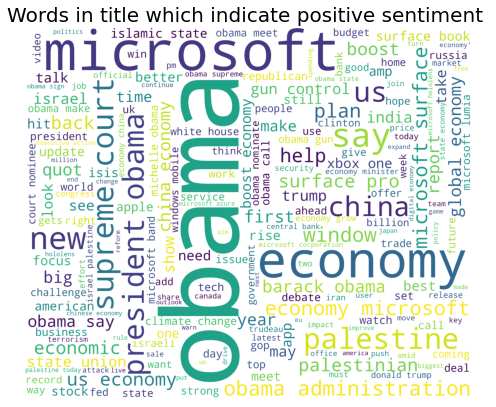

In [16]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(positive_SentimentTitle['Title']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words in title which indicate positive sentiment ",fontsize=20)
plt.show()

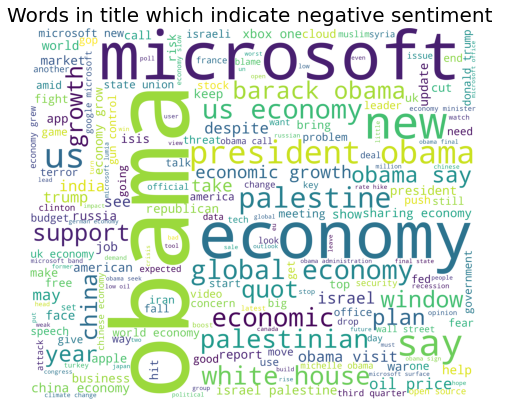

In [17]:
from wordcloud import WordCloud
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(negative_SentimentTitle['Title']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words in title which indicate negative sentiment ",fontsize=20)
plt.show()

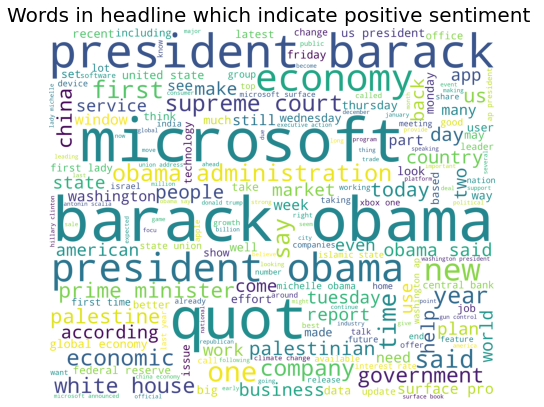

In [18]:
from wordcloud import WordCloud
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(positive_SentimentHeadline['Headline']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words in headline which indicate positive sentiment ",fontsize=20)
plt.show()

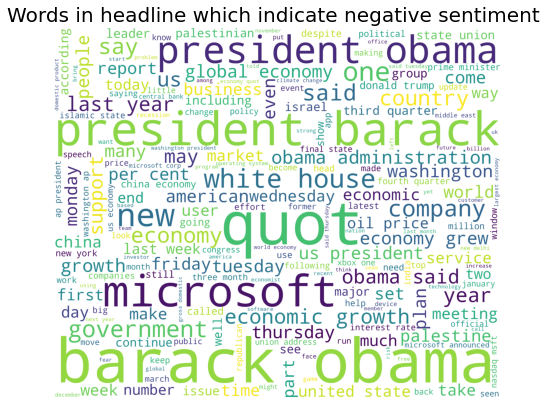

In [19]:
from wordcloud import WordCloud
wordcloud4 = WordCloud(background_color='white', width=3000, height=2500).generate(' '.join(negative_SentimentHeadline['Headline']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud4)
plt.axis('off')
plt.title("Words in headline which indicate negative sentiment ",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

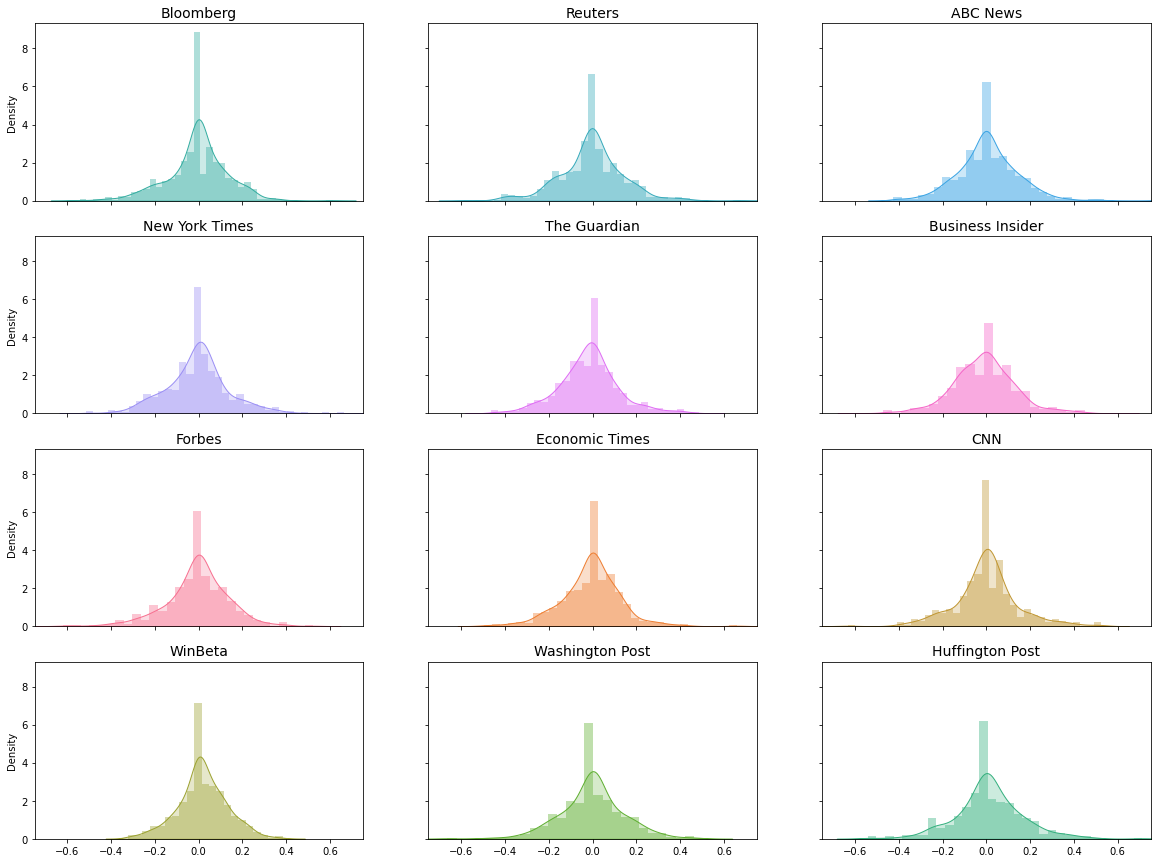

In [20]:
# Get the list of top 12 sources by number of articles
source_names = list(train['Source'].value_counts()[:12].index)
source_colors = list(sns.husl_palette(12, h=.5))

fig, ax = plt.subplots(4, 3, figsize=(20, 15), sharex=True, sharey=True)

ax = ax.flatten()
for ax, source, color in zip(ax, source_names, source_colors):
    sns.distplot(train.loc[train['Source'] == source]['SentimentTitle'],
                               ax=ax, color=color, kde_kws={'shade':True})
    ax.set_title(source, fontsize=14)
    ax.set_xlabel('')
    
plt.xlim(-0.75, 0.75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

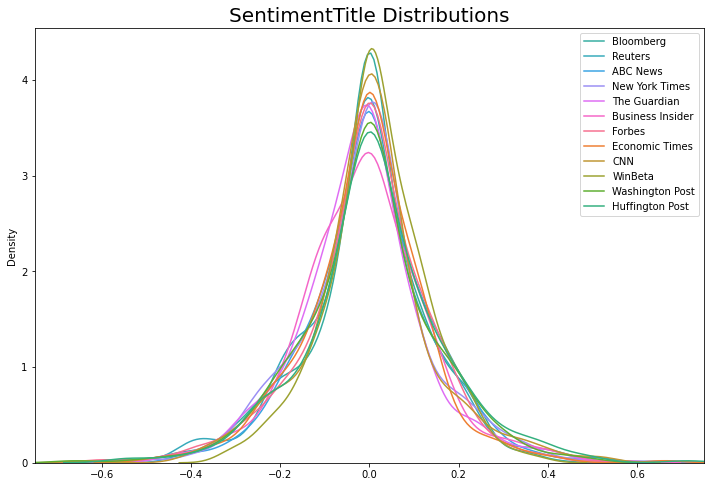

In [21]:
# Overlay each density curve on the same plot for closer comparison

fig, ax = plt.subplots(figsize=(12, 8))

for source, color in zip(source_names, source_colors):
    sns.distplot(train.loc[train['Source'] == source]['SentimentTitle'],
                               ax=ax, hist=False, label=source, color=color)
    ax.set_xlabel('')
    
plt.xlim(-0.75, 0.75)
plt.title("SentimentTitle Distributions", fontsize=20)
plt.legend(loc='best')
plt.show()

The sentiment distributions for title from all sources are similar (Top 12 sources are considered here)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

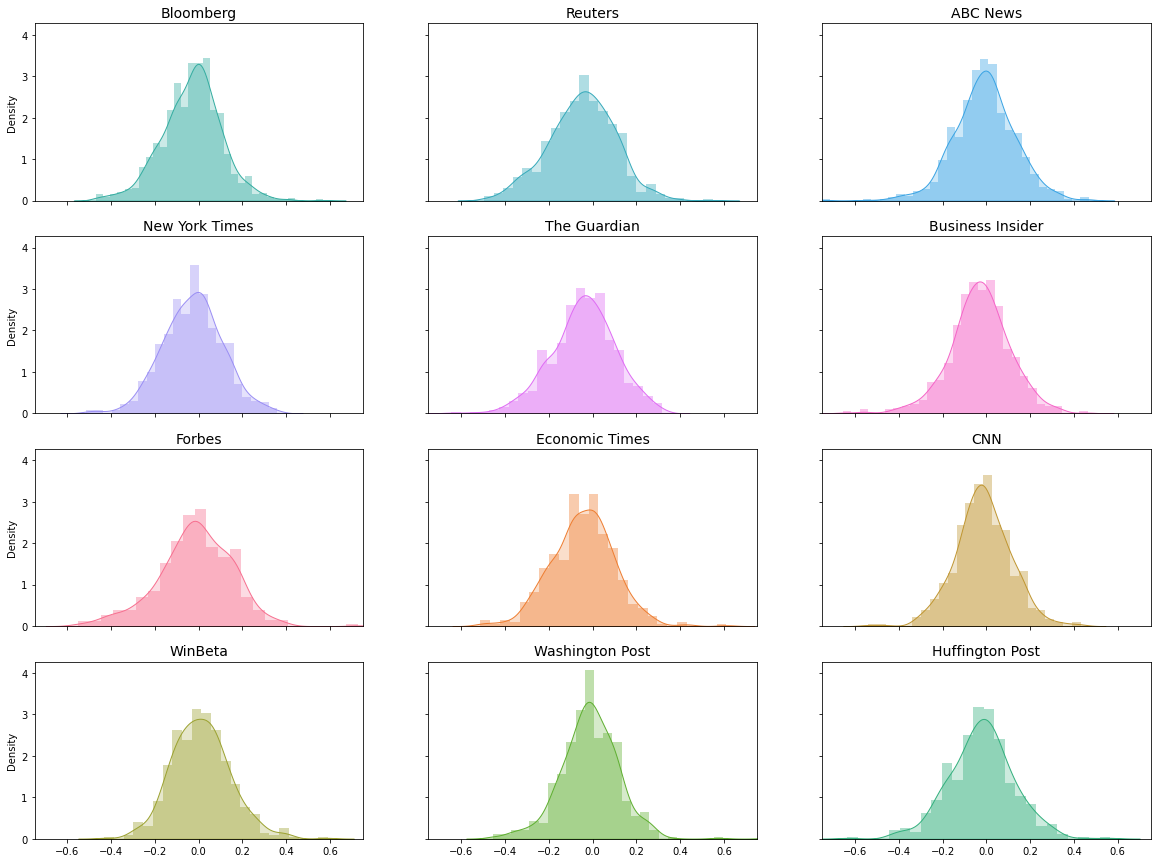

In [22]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15), sharex=True, sharey=True)

ax = ax.flatten()
for ax, source, color in zip(ax, source_names, source_colors):
    sns.distplot(train.loc[train['Source'] == source]['SentimentHeadline'],
                               ax=ax, color=color, kde_kws={'shade':True})
    ax.set_title(source, fontsize=14)
    ax.set_xlabel('')
    
plt.xlim(-0.75, 0.75)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

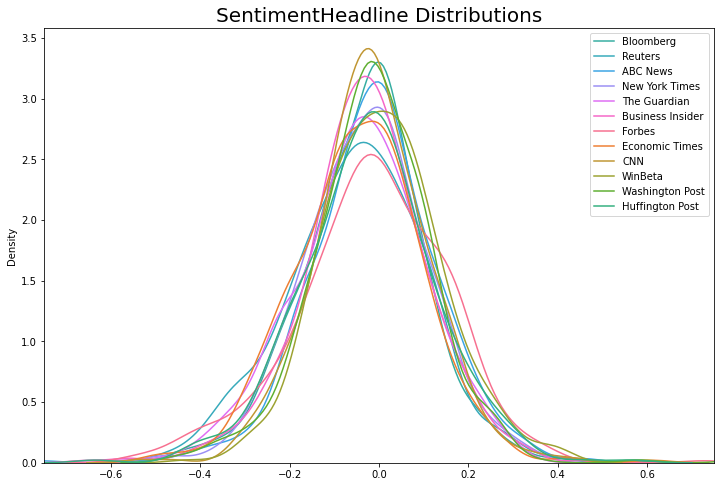

In [23]:
# Overlay each density curve on the same plot for closer comparison

fig, ax = plt.subplots(figsize=(12, 8))

for source, color in zip(source_names, source_colors):
    sns.distplot(train.loc[train['Source'] == source]['SentimentHeadline'],
                               ax=ax, hist=False, label=source, color=color)
    ax.set_xlabel('')
    
plt.xlim(-0.75, 0.75)
plt.title("SentimentHeadline Distributions", fontsize=20)
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


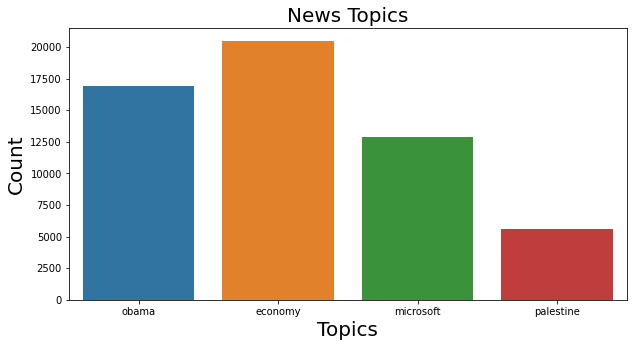

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(train['Topic'])
plt.title("News Topics", fontsize=20)
plt.xlabel('Topics', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

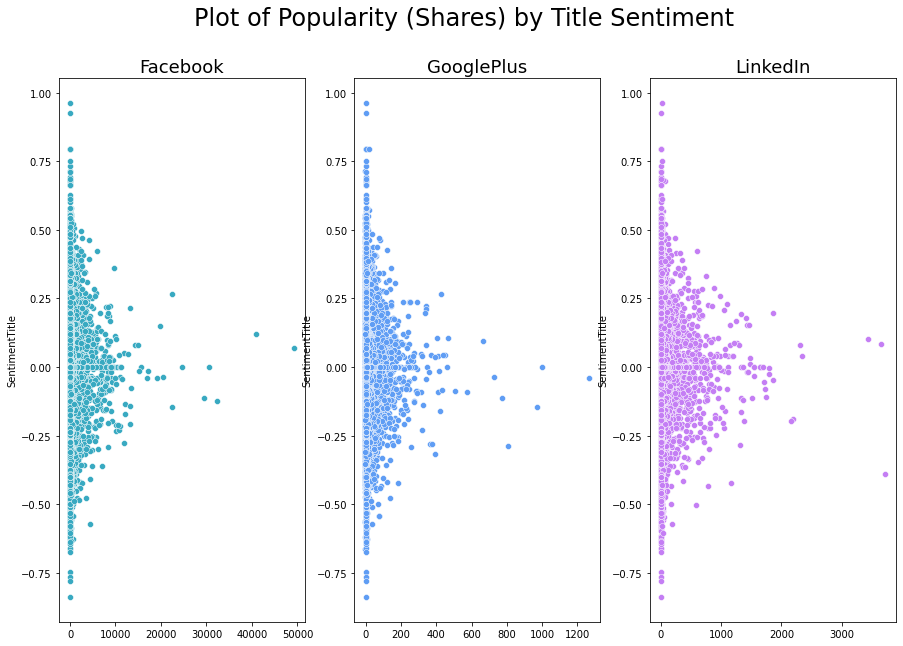

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

subplots = [a for a in ax]
platforms = ['Facebook', 'GooglePlus', 'LinkedIn']
colors = list(sns.husl_palette(10, h=.5)[1:4]) 

for platform, subplot, color in zip(platforms, subplots, colors):
    sns.scatterplot(x = train[platform], y = train['SentimentTitle'], ax=subplot, color=color)
    subplot.set_title(platform, fontsize=18)
    subplot.set_xlabel('') 
    
fig.suptitle('Plot of Popularity (Shares) by Title Sentiment', fontsize=24)

plt.show()

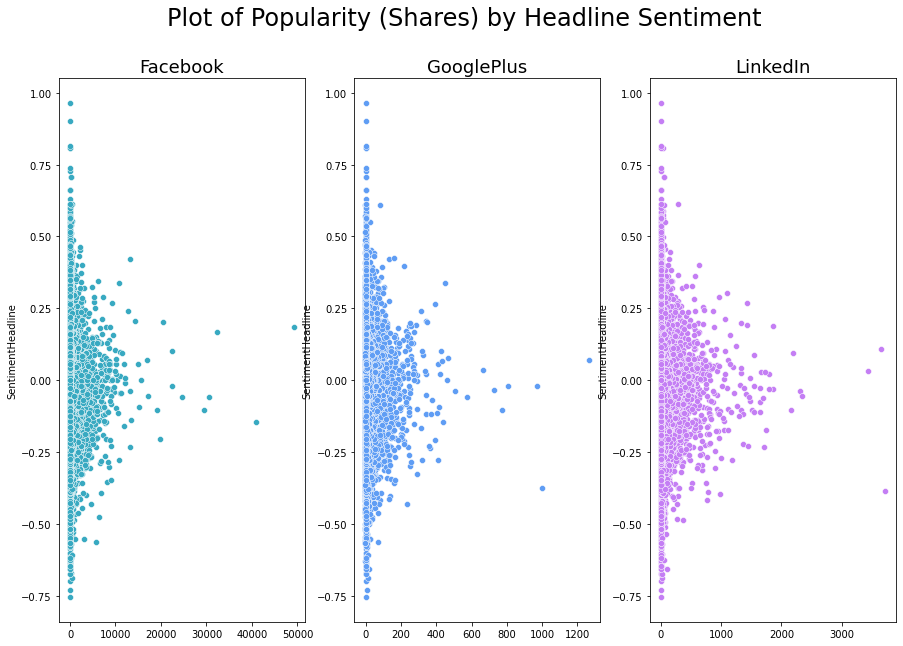

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

subplots = [a for a in ax]
platforms = ['Facebook', 'GooglePlus', 'LinkedIn']
colors = list(sns.husl_palette(10, h=.5)[1:4]) 

for platform, subplot, color in zip(platforms, subplots, colors):
    sns.scatterplot(x = train[platform], y = train['SentimentHeadline'], ax=subplot, color=color)
    subplot.set_title(platform, fontsize=18)
    subplot.set_xlabel('') 
    
fig.suptitle('Plot of Popularity (Shares) by Headline Sentiment', fontsize=24)

plt.show()

In [27]:
title_corpus = list(train['Title'])
headline_corpus = list(train['Headline'])

test_title_corpus = list(test['Title'])
test_headline_corpus = list(test['Headline'])

In [28]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1500)
X_SentimentTitle = cv.fit_transform(title_corpus).toarray()
y_SentimentTitle = train['SentimentTitle']

X_SentimentHeadline = cv.fit_transform(headline_corpus).toarray()
y_SentimentHeadline = train['SentimentHeadline']

X_test_title = cv.fit_transform(test_title_corpus).toarray()
X_test_headline = cv.fit_transform(test_headline_corpus).toarray()



In [29]:
from sklearn.model_selection import train_test_split
X_SentimentTitle_train, X_SentimentTitle_test, y_SentimentTitle_train, y_SentimentTitle_test = train_test_split(X_SentimentTitle, y_SentimentTitle, test_size = 0.20, random_state = 0)
X_SentimentHeadline_train, X_SentimentHeadline_test, y_SentimentHeadline_train, y_SentimentHeadline_test = train_test_split(X_SentimentHeadline, y_SentimentHeadline, test_size = 0.20, random_state = 0)

In [30]:
from xgboost import XGBRegressor
import xgboost as xgb

In [31]:
# from sklearn.metrics import mean_squared_error

# # Instantiate an XGBRegressor
# xgr_title = xgb.XGBRegressor(random_state=2)
# xgr_title.fit(X_SentimentTitle_train, y_SentimentTitle_train)

# xgr_headline = xgb.XGBRegressor(random_state=2)
# xgr_headline.fit(X_SentimentHeadline_train, y_SentimentHeadline_train)



In [32]:
# from sklearn.model_selection import GridSearchCV

# # Various hyper-parameters to tune
# xgr_title = xgb.XGBRegressor()
# parameters = {'nthread':[4], 
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], 
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [250]}

# xgr_title_grid = GridSearchCV(xgr_title,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgr_title_grid.fit(X_SentimentTitle_train, y_SentimentTitle_train)
# print(xgr_title_grid.best_score_)
# print(xgr_title_grid.best_params_)

In [33]:
# # Various hyper-parameters to tune
# xgr_headline = xgb.XGBRegressor()
# parameters = {'nthread':[4], 
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], 
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [250]}

# xgr_headline_grid = GridSearchCV(xgr_headline,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgr_headline_grid.fit(X_SentimentHeadline_train, y_SentimentHeadline_train)
# print(xgr_headline_grid.best_score_)
# print(xgr_headline_grid.best_params_)

In [35]:
title_params = {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 
                'n_estimators': 250, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

xgr_title_final = xgb.XGBRegressor(random_state=2, **title_params)
xgr_title_final.fit(X_SentimentTitle_train, y_SentimentTitle_train)

test_pred_title = xgr_title_final.predict(X_SentimentTitle_test)


In [36]:
headline_params= {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 
                  'n_estimators': 250, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}

xgr_headline_final = xgb.XGBRegressor(random_state=2, **headline_params)

xgr_headline_final.fit(X_SentimentHeadline_train, y_SentimentHeadline_train)

test_pred_headline = xgr_headline_final.predict(X_SentimentHeadline_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae_title = mean_absolute_error(y_SentimentTitle_test,test_pred_title)
mae_headline = mean_absolute_error(y_SentimentHeadline_test, test_pred_headline)

In [38]:
score=1-((0.4*mae_title)+(0.6*mae_headline))

In [39]:
score

0.9147689364229923

In [40]:
# Test data
pred_title = xgr_title_final.predict(X_test_title)
pred_headline = xgr_headline_final.predict(X_test_headline)

submission=pd.DataFrame()

submission['IDLink']=test['IDLink'].to_list()
submission['SentimentTitle']=pred_title
submission['SentimentHeadline']=pred_headline

In [41]:
submission.head()

,IDLink,SentimentTitle,SentimentHeadline
0,tFrqIR6Chj,0.024017,-0.078971
1,DVAaGErjlF,-0.009159,-0.179419
2,OT9UIZm5M2,-0.013375,-0.032195
3,lflGp3q2Fj,-0.009159,0.051419
4,zDYG0SoovZ,-0.009159,-0.020936


In [42]:
submission.to_csv('/content/drive/MyDrive/ZS_assignment_dataset/submission_1.csv')